# 1. Install **cvxpy**

In [ ]:
!pip install cvxpy

In [2]:
# enable one cell to output multiple result 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# import library 
import cvxpy as cp
import numpy as np

# 2. Create Code Skeleton

In [2]:

def generate_data(X_size, w_size, laplace_loc, laplace_scale, laplace_size):
  """ Generate data in terms of related parameters
  
    Args: 

      X_size(tuple): (sample size, feature dim)
      w_size(tuple): (feature dim, 1)
      laplace_loc(float): Laplace(laplace_loc, laplace_scale)
      laplace_scale(float): Laplace(laplace_loc, laplace_scale)
      laplace_size(tuple): (sample size, 1)
    
    Return: 

      X(numpy.array): a matrix with (sample size, feature dim) shape 
      w(numpy.array): a column vector with (feature dim, 1) shape 
      y(numpy.array): a column vector with (sample size, 1)
      
  """


  rng = np.random.default_rng(seed=42)

  w = rng.standard_normal(size=w_size)

  X = rng.standard_normal(size=X_size)

  epsilon = rng.laplace(loc=laplace_loc, scale=laplace_scale, size=laplace_size)

  y = X@w + epsilon 


  return X, w, y 

result_norm1, result_sum_squares = [], []


def fit_model(X, w, y): 
  """Fit data to objective function 

    Args:

      X(numpy.array): a matrix with (sample size, feature dim) shape 
      w(numpy.array): a column vector with (feature dim, 1) shape 
      y(numpy.array): a column vector with (sample size, 1)

    Return: 

      estimate_error(list): [norm1_error, sum_square_error]
    
  """
  estimate_error.append(error)
  
  estimate_error = [] 

  for cost_fun in (cp.norm1, cp.sum_squares):

    w_estimate = cp.Variable(shape=w.shape)

    cost = cost_fun(X @ w_estimate - y)

    prob = cp.Problem(cp.Minimize(cost))

    prob.solve() 

    error = np.linalg.norm(w_estimate.value - w)

    estimate_error.append(error)

  return estimate_error 

# 3. Generate Data and Fit Model

In [7]:
# step1 generate data 
feature_dim = 20 
sample_size = 100 
laplace_loc, laplace_scale = 0, 0.5 

X, w, y = generate_data(X_size=(sample_size, feature_dim), 
                        w_size=(feature_dim, 1),
                        laplace_loc=laplace_loc,
                        laplace_scale=laplace_scale,
                        laplace_size=(sample_size,1))


# step1 fit models 
error_list = fit_model(X, w, y)

print((f"The estimate error of LAD is {error_list[0]:.4f}\n"
       f"The estimate error of SSE is {error_list[1]:.4f}\n"
       f"the estimate error of LAD is smaller than that of SSE"))

The estimate error of LAD is 0.2938
The estimate error of SSE is 0.3734
the estimate error of LAD is smaller than that of SSE


# 4. Tune Parameters 

In [8]:
# fix other parameters 
feature_dim = 20 
sample_size = np.arange(50, 300, 10)
laplace_loc, laplace_scale = 0, np.arange(0.5, 3.5, 0.5) 

In [9]:
sample_size

array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290])

In [10]:
laplace_scale

array([0.5, 1. , 1.5, 2. , 2.5, 3. ])

In [11]:
import matplotlib.pyplot as plt 

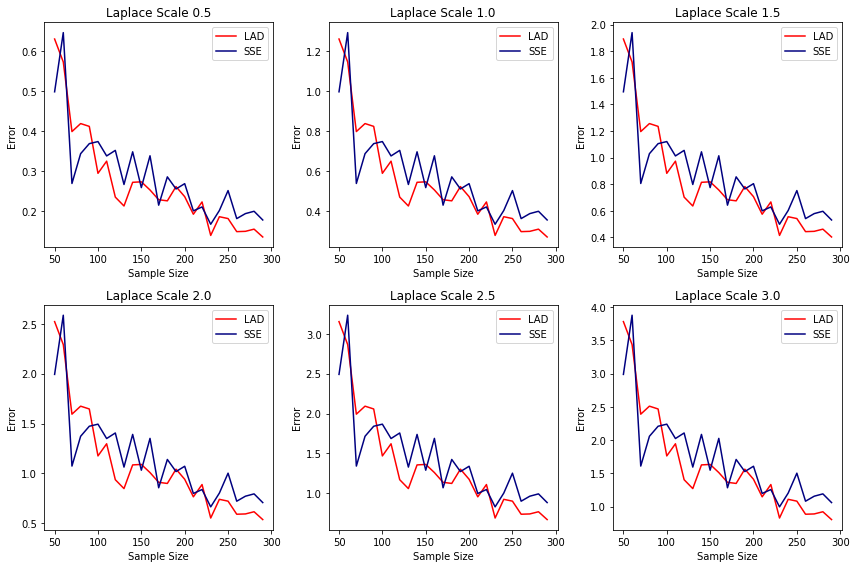

In [12]:

fig, axs = plt.subplots(2,3);

axs = axs.flatten() 


for ind, scale in enumerate(laplace_scale):
  ax = axs[ind]
  error_for_plot = [] 

  for size in sample_size: 

    X, w, y = generate_data(X_size=(size, feature_dim), 
                          w_size=(feature_dim, 1),
                          laplace_loc=laplace_loc,
                          laplace_scale=scale,
                          laplace_size=(size,1))

    error_list = fit_model(X, w, y)

    error_for_plot.append(error_list)

  # plot lad 
  _ = ax.plot(sample_size, [errors[0] for errors in error_for_plot], c='red', 
              label = "LAD")

  # plot sse 
  _ = ax.plot(sample_size, [errors[1] for errors in error_for_plot], c='navy',
              label="SSE")

  _ = ax.set_xlabel("Sample Size")
  _ = ax.set_ylabel("Error")
  _ = ax.set_title(f"Laplace Scale {scale}")

  _ = ax.legend() 


fig.set_size_inches(12, 8)

fig.set_tight_layout("pad")



In [13]:
%whos

Variable             Type           Data/Info
---------------------------------------------
X                    ndarray        290x20: 5800 elems, type `float64`, 46400 bytes
ax                   AxesSubplot    AxesSubplot(0.713657,0.0725694;0.264997x0.390278)
axs                  ndarray        6: 6 elems, type `object`, 48 bytes
cp                   module         <module 'cvxpy' from '/us<...>kages/cvxpy/__init__.py'>
cvxpy                module         <module 'cvxpy' from '/us<...>kages/cvxpy/__init__.py'>
error_for_plot       list           n=25
error_list           list           n=2
feature_dim          int            20
fig                  Figure         Figure(864x576)
fit_model            function       <function fit_model at 0x7f55eb5dda60>
generate_data        function       <function generate_data at 0x7f55eb5dd598>
ind                  int            5
laplace_loc          int            0
laplace_scale        ndarray        6: 6 elems, type `float64`, 48 bytes
np     